In [1]:
import os

os.chdir("..")

In [2]:
import torch
from src.pipeline_flux_omini_kontext import FluxOminiKontextPipeline
from PIL import Image
from utils import optimise_image_condition


/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`flash-attn` is not available or the version is too old. Please install `flash-attn>=2.6.3`.
`sageattention` is not available or the version is too old. Please install `sageattention>=2.1.1`.


In [3]:
# !export HF_HUB_CACHE=./cache

In [4]:
pipe = FluxOminiKontextPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-Kontext-dev", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")

Loading pipeline components...: 100%|█████████████████████████████████████████| 7/7 [00:01<00:00,  6.88it/s]


In [5]:
image = Image.open("assets/scene_01.png").convert("RGB")
reference = Image.open("assets/boy_reference_512.png").convert("RGB")

width, height = image.size


prompt = "Add character to the image."


seed = torch.Generator().manual_seed(42)

result_img = pipe(
    prompt=prompt,
    image=image,
    reference=reference,
    reference_delta=[0, 0, (1024 + 512)//16],
    num_inference_steps=14,
    height=height,
    width=width,
    generator=seed,
).images[0]



100%|███████████████████████████████████████████████████████████████████████| 14/14 [00:20<00:00,  1.45s/it]


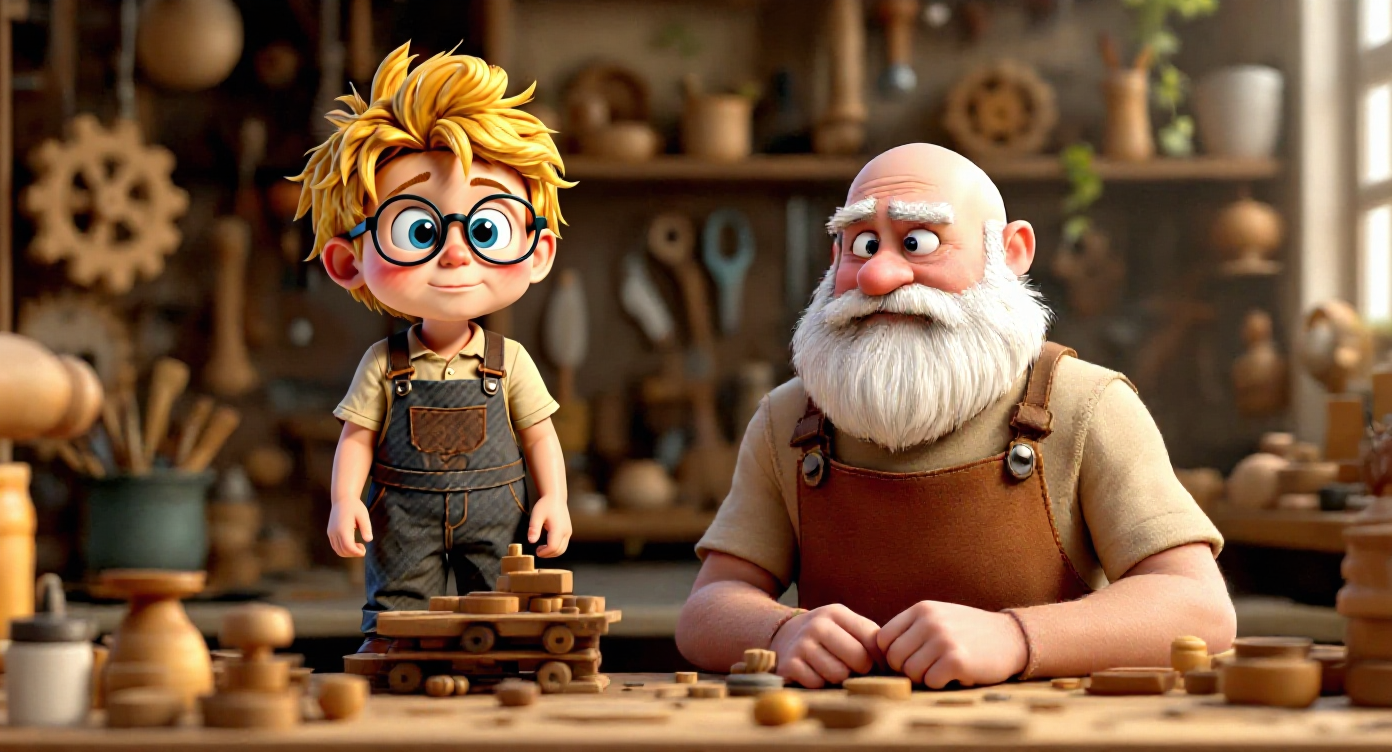

In [6]:
result_img

In [7]:
pipe.load_lora_weights(
    "saquiboye/omini-kontext-character",
    weight_name="character_3000.safetensors",
    adapter_name="lora_weights"
)

Loading adapter weights from state_dict led to unexpected keys found in the model: single_transformer_blocks.0.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.0.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.1.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.1.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.2.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.2.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.3.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.3.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.4.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.4.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.5.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.5.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.6.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.6.proj_out.lora_B.lora_weights.weight, single_

In [8]:
seed = torch.Generator().manual_seed(42)
reference_delta = [0, 0, (1024 + 512)//16]

optimised_reference, reference_delta = optimise_image_condition(reference, reference_delta)

result_img = pipe(
    prompt=prompt,
    image=image,
    reference=optimised_reference,
    reference_delta=reference_delta,
    num_inference_steps=14,
    height=height,
    width=width,
    generator=seed,
).images[0]

100%|███████████████████████████████████████████████████████████████████████| 14/14 [00:23<00:00,  1.69s/it]


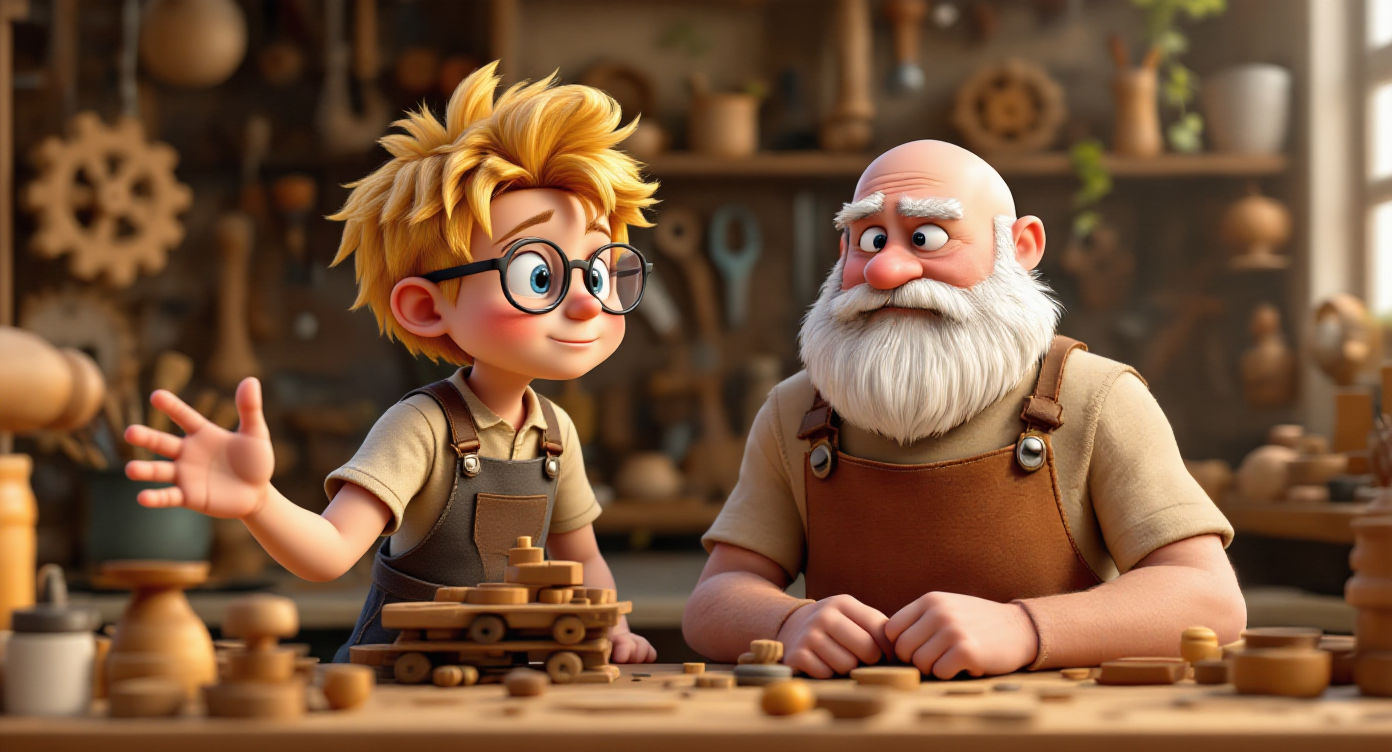

In [9]:
result_img